# Author: IPBA Group G || Description: Analysis and Prediction of Promotion

Purpose of code


In [6]:
# Import some required packages/libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

sns.set_style(style = "darkgrid")
plt.rcParams['figure.figsize'] = [5.0, 8.0] # make plot sizes, relatively larger than the normal notebook


In [7]:
#pip install pandas-profiling 
from pandas_profiling import ProfileReport

# Complete EDA in one command 
#promo.profile_report()

In [8]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\PYTHON\\BYOP Series of files GG'

In [9]:
# Change the current working directory
#os.chdir('File Address')
#if the CSV file has delimiter load using delimiter
#promo = pd.read_csv("File.csv", delimiter = ";") #, index_col = ["employee_id"])

In [10]:
#Load the dataset
promo = pd.read_csv("C:/Users/hp/Desktop/PYTHON/BYOP GG HR Analytics Promotion prediction Raw Data File.csv") #, index_col = ["employee_id"])

In [11]:
promo.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [12]:
#to check column name for spaces
print(promo.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [13]:
#to replace space in all column name at once
#promo.columns = promo.columns.str.strip() # Leading and trailing
#promo.columns = promo.columns.str.lstrip() # Leading only
#promo.columns = promo.columns.str.rstrip() # Trailing only
#promo.columns = promo.columns.str.replace(' ','_') #to replace space in column with other underscore

In [14]:
#if the categorical data is in Yes/no instead of 0 and 1 convert using
#import numpy as np 
#df['is_promoted'] = np.where(df['is_promoted'] == 'Yes', 1, 0)

# Data Description and Verification

In [15]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [16]:
#Distribution analysis of numerical and categorical columns
promo.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


Note: 1.This data covers employees from 9 different department, where maximum employees belongs to 
        Sales and Marketting Department i.e. nearly 1/3rd of total employees.
      2.There are total 34 regions whereas around 1/4th are from region 2.
      3.Nearly 2/3rd of the employees have only Bachelor's degree.
      4.Nearly 2/3rd of the employees are male and rest are female.
      5.More than 75% employee has only taken one training.
      6.Age of the employees ranges from 20-60 years whereas around 75% employees are below 40 years.
      7.The average rating of the employees is between 3-4.
      8.Less than 3% of the employees has received award atleast once in their tenure.
      9.The minimum score obtained in the training by any employee is 39 and avg score is 64.
      10.Only 8.5% of the total employees got promoted.
        

In [17]:
Uniq = promo.nunique() #Why only 8/12 feature????

In [18]:
Uniq

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

In [19]:
print(promo['education'].unique())  #why so?

["Master's & above" "Bachelor's" nan 'Below Secondary']


In [20]:
# to find duplicates if any 
promo.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Length: 54808, dtype: bool

Note: There are no duplicate values in the dataset to remove.

# Treatment of Missing values

In [21]:
#We can drop the null value rows if they are very less as compare to the data, using the code below:
#df.dropna(inplace = True)

In [22]:
# Sum of null values in each column
promo.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [23]:
#IMPORTANT:
#To treat missing values in a categorical column - apply classifier algo  - remove missing value from train dataset
# put missing value data in test dataset # run the model with train data set and predict the missing value from test data.

In [24]:
#Finding the mean of the column having NaN
mean_value=promo['avg_training_score'].mean()
  
print('Mean Value:',mean_value,)

# Replace NaNs in column avg_training_score with the mean of values in the same column
promo['avg_training_score'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(promo)

Mean Value: 63.71223778900628
Updated Dataframe:
       employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel 

In [25]:
# Replace NaNs in column 'education' with dummy value 'NA' in the same column
promo['education'].fillna(value='NA', inplace=True)
print('Updated Dataframe:')
promo

Updated Dataframe:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.000000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.000000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.000000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.000000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.000000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.000000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.000000,0
54806,13614,Sales & Marketing,region_9,NA,m,sourcing,1,29,1.0,2,0,63.712238,0


In [26]:
#Finding the mean of the column having NaN
mean_value1=promo['previous_year_rating'].mean()
 
print("Mean Value1:", mean_value1)

# Replace NaNs in column avg_training_score with the mean of values in the same column
promo['previous_year_rating'].fillna(value=mean_value1, inplace=True)
print('Updated Dataframe:')
promo.head()

Mean Value1: 3.329255780917055
Updated Dataframe:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


# Detecting Outliers

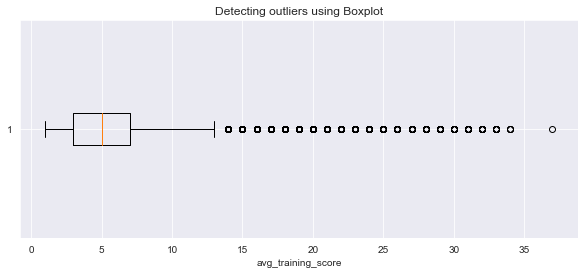

In [27]:
#Boxplots
fig = plt.figure(figsize =(10, 4))
plt.boxplot(promo["length_of_service"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('avg_training_score')
plt.show()

In [28]:
#Class Bucket   

<AxesSubplot:xlabel='length_of_service', ylabel='avg_training_score'>

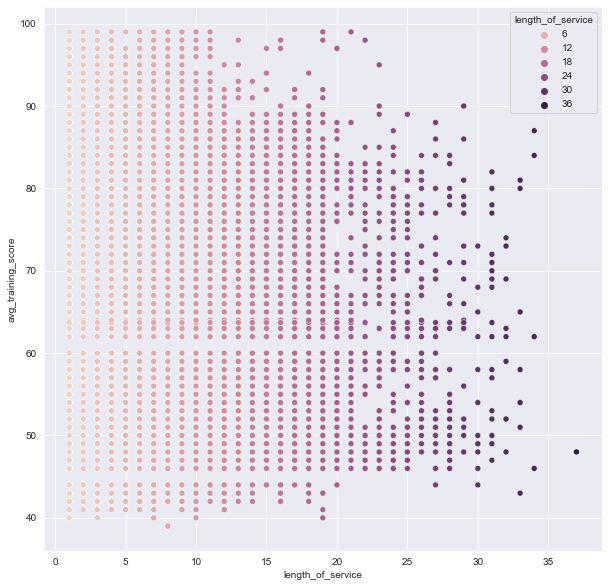

In [29]:
fig = plt.figure(figsize =(10,10))
sns.scatterplot(data=promo, x=promo['length_of_service'], y=promo['avg_training_score'], hue=promo['length_of_service'])

In [30]:
#Outliers using z-score
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(promo["length_of_service"])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [26, 19, 23, 19, 20, 19, 19, 22, 25, 28, 19, 25, 24, 19, 19, 24, 19, 23, 20, 19, 31, 21, 29, 31, 21, 28, 24, 19, 19, 21, 30, 19, 19, 28, 19, 20, 21, 20, 28, 31, 22, 34, 21, 25, 30, 29, 23, 24, 27, 25, 20, 20, 23, 24, 21, 30, 27, 19, 26, 23, 22, 23, 19, 19, 21, 19, 20, 19, 23, 23, 20, 22, 22, 20, 20, 23, 26, 23, 22, 23, 20, 25, 19, 19, 27, 26, 19, 20, 19, 19, 19, 19, 19, 22, 19, 19, 20, 25, 19, 19, 19, 21, 24, 20, 21, 22, 27, 27, 22, 20, 19, 19, 22, 31, 23, 19, 19, 25, 21, 19, 19, 25, 23, 19, 19, 22, 28, 21, 28, 19, 21, 21, 19, 19, 19, 24, 24, 24, 20, 22, 29, 19, 19, 25, 19, 19, 23, 20, 21, 22, 23, 20, 19, 24, 25, 19, 33, 19, 23, 19, 22, 21, 22, 23, 19, 20, 19, 21, 32, 20, 24, 20, 19, 19, 29, 21, 19, 21, 19, 19, 27, 21, 19, 19, 22, 21, 31, 20, 28, 26, 19, 19, 20, 23, 22, 19, 25, 19, 19, 25, 19, 19, 20, 24, 27, 19, 31, 19, 26, 19, 19, 19, 23, 29, 20, 26, 19, 20, 34, 22, 26, 19, 19, 19, 23, 22, 22, 19, 19, 19, 19, 19, 19, 19, 20, 21, 20, 33, 27, 26, 23, 19,

In [31]:
#Detecting Outlier using IQR
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(promo["length_of_service"])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 

# Handling Outlier

In [32]:
#Trimming/Remove the outliers
# Trimming
#for i in sample_outliers:
 #   a = np.delete(sample, np.where(sample==i))
#print(a)
# print(len(sample), len(a))


# Univariate Analysis

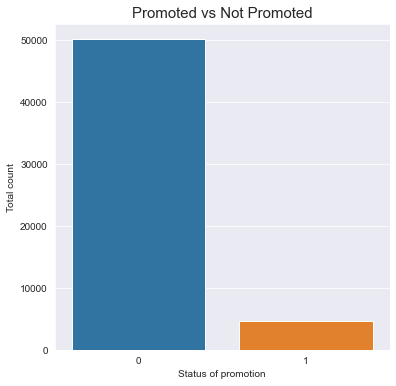

In [33]:
###Promoted vs Not Promoted

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 6 , 6 ))
  
# Plot the countplot
sns.countplot( ax = ax , x = "is_promoted" , data = promo )

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Status of promotion" , size = 10 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 10 )
  
# Set title for plot
ax.set_title( "Promoted vs Not Promoted" , size = 15 )
  
# Display figure
plt.show()

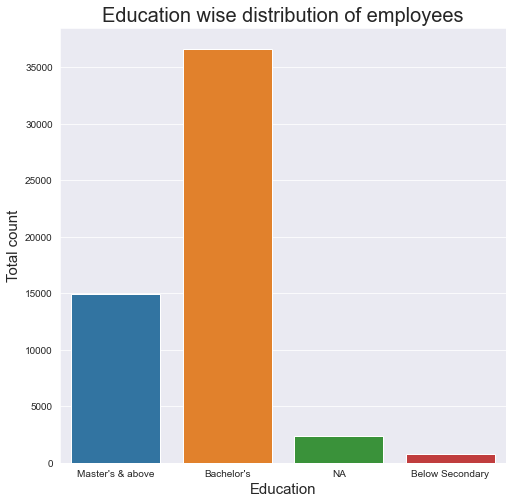

In [34]:
### Education wise distribution of employees

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 8 , 8 ))
  
# Plot the countplot
sns.countplot( ax = ax , x = "education" , data = promo )

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Education" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Education wise distribution of employees" , size = 20)
  
# Display figure
plt.show()

Note: 1. Around 70% employees have bachelors degree and 30% have master's degree.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


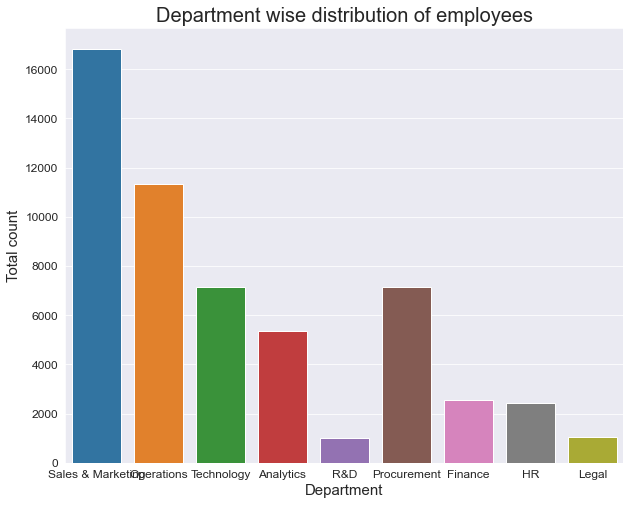

In [35]:
### Distribution of employees in various departments

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 10 , 8 ))
  
# Plot the histogram
sns.countplot('department',data = promo)

#Axis value size
plt.tick_params(labelsize=12)
  
# Set label for x-axis
ax.set_xlabel( "Department" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Department wise distribution of employees" , size = 20)

# Display figure
plt.show()


Text(0.5, 1.0, 'Age wise distribution of employees')

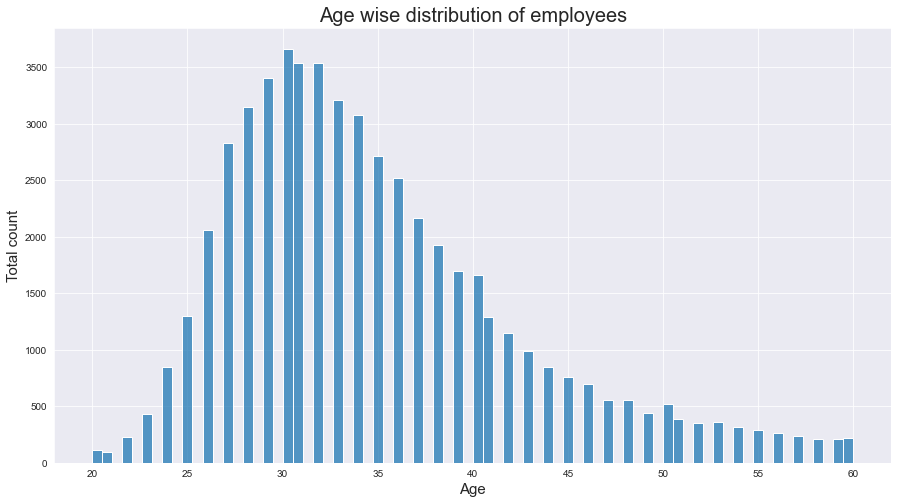

In [36]:
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 15 , 8 ))
  
# Plot the histogram
sns.histplot( ax = ax , x = "age" , data = promo)

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Age" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Age wise distribution of employees" , size = 20)


Note: 1. Age of the employees is between 24 to 40 years.

Text(0.5, 1.0, 'Training score wise distribution of employees')

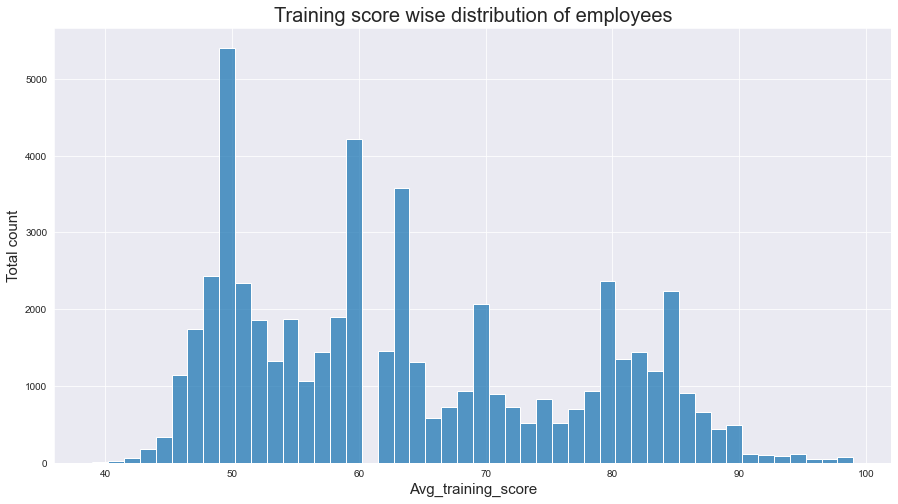

In [37]:
### Distribution of Average Training Score

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 15 , 8 ))
  
# Plot the histogram
sns.histplot( ax = ax , x = "avg_training_score" , data = promo)

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Avg_training_score" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Training score wise distribution of employees" , size = 20)

# Bivariate Analysis

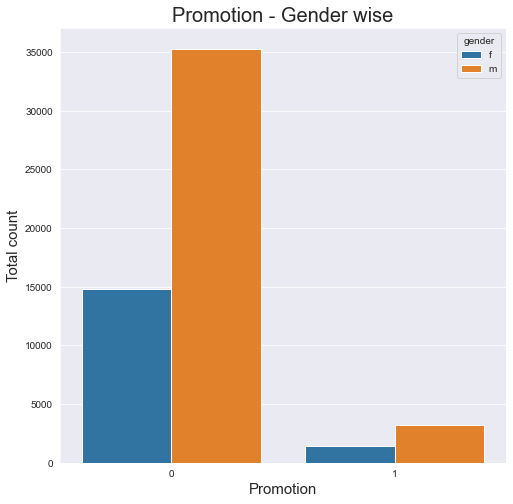

In [38]:
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 8 , 8 ))
  
# Plot the scatterplot
sns.countplot(x = "is_promoted", hue = "gender", data = promo)

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Promotion" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Promotion - Gender wise" , size = 20)
  
# Display figure
plt.show()



Note: 1. It seems there is no such bias in giving promotion.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


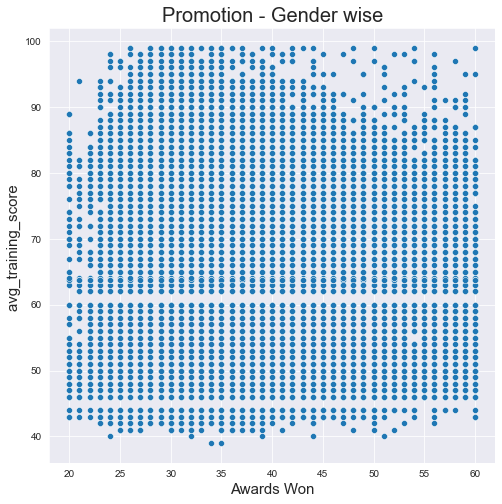

In [39]:
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 8 , 8 ))
  
# Plot the scatterplot
sns.scatterplot(promo['age'],promo['avg_training_score'])

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Awards Won" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "avg_training_score " , size = 15 )
  
# Set title for plot
ax.set_title( "Promotion - Gender wise" , size = 20)
  
# Display figure
plt.show()

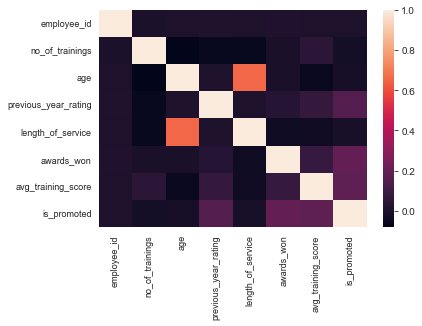

In [40]:
###Heat Map
#Set plot size
fig = plt.figure(figsize =(6, 4))
#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=9)

sns.heatmap(promo.select_dtypes(['float64' , 'int']).corr())
plt.show()


Note: 1. There is high correlation between age and Length of service, we can drop age column.
      2. We can also drop employee ID, department, region, gender and recruitment channel as it will not impact the model.

In [41]:
## Dropping columns:- employee_id, department, region, gender, recruitment_channel
promo.drop(['age','employee_id', 'department', 'region', 'gender', 'recruitment_channel'],axis=1,inplace=True)
print(promo)

              education  no_of_trainings  previous_year_rating  \
0      Master's & above                1                   5.0   
1            Bachelor's                1                   5.0   
2            Bachelor's                1                   3.0   
3            Bachelor's                2                   1.0   
4            Bachelor's                1                   3.0   
...                 ...              ...                   ...   
54803        Bachelor's                1                   3.0   
54804  Master's & above                1                   2.0   
54805        Bachelor's                1                   5.0   
54806                NA                1                   1.0   
54807        Bachelor's                1                   1.0   

       length_of_service  awards_won  avg_training_score  is_promoted  
0                      8           0           49.000000            0  
1                      4           0           60.000000       

# Label Encoding

In [42]:
#Checking for the labels in the categorical parameters 
print(promo['education'].unique())


["Master's & above" "Bachelor's" 'NA' 'Below Secondary']


In [43]:
#Checking for the label counts in the categorical parameters
promo['education'].value_counts()


Bachelor's          36669
Master's & above    14925
NA                   2409
Below Secondary       805
Name: education, dtype: int64

In [44]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
promo['education'] = le.fit_transform(promo['education'])
promo

,education,no_of_trainings,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,2,1,5.0,8,0,49.000000,0
1,0,1,5.0,4,0,60.000000,0
2,0,1,3.0,7,0,50.000000,0
3,0,2,1.0,10,0,50.000000,0
4,0,1,3.0,2,0,73.000000,0
...,...,...,...,...,...,...,...
54803,0,1,3.0,17,0,78.000000,0
54804,2,1,2.0,6,0,56.000000,0
54805,0,1,5.0,3,0,79.000000,0
54806,3,1,1.0,2,0,63.712238,0


# Standardization - Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
 
# separate the independent and dependent variables
X_promo = promo.drop(['is_promoted'], axis = 1)
Y_promo = promo['is_promoted']
 
# standardization of dependent variables
X_promo = scale.fit_transform(X_promo) 
print(X_promo)

Y_promo = pd.DataFrame(Y_promo)

[[ 1.29478600e+00 -4.15276153e-01  1.37890012e+00  5.00459556e-01
  -1.54017755e-01 -1.11437663e+00]
 [-6.83763394e-01 -4.15276153e-01  1.37890012e+00 -4.37394645e-01
  -1.54017755e-01 -2.81182991e-01]
 [-6.83763394e-01 -4.15276153e-01 -2.71741677e-01  2.65996006e-01
  -1.54017755e-01 -1.03863175e+00]
 ...
 [-6.83763394e-01 -4.15276153e-01  1.37890012e+00 -6.71858195e-01
  -1.54017755e-01  1.15796965e+00]
 [ 2.28406070e+00 -4.15276153e-01 -1.92238348e+00 -9.06321745e-01
  -1.54017755e-01  5.38199714e-16]
 [-6.83763394e-01 -4.15276153e-01 -1.92238348e+00 -2.02931094e-01
  -1.54017755e-01 -1.11437663e+00]]


# Solving Class Imbalance using SMOTE 

In [46]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X_promo, Y_promo)

print(f'''Shape of X before SMOTE: {X_promo.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (54808, 6)
Shape of X after SMOTE: (100280, 6)

Balance of positive and negative classes (%):


is_promoted
0              50.0
1              50.0
dtype: float64

# Grid Search for Lasso Regularization Regression, Logistic Regression and Random Forest Classifier

In [86]:
model_params = {
    'LassoReg': {
        'model': Lasso(alpha ='auto'),
        'params' : {
        'alpha':[0.02, 0.05, 0.07, 0.09, 0.1, 0.5]
        } 
    },  
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
}

In [87]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_sm, y_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model,best_score,best_params
0,LassoReg,-1.029397,{'alpha': 0.02}
1,random_forest,0.873295,{'n_estimators': 10}
2,logistic_regression,0.662834,{'C': 1}


# Splitting The Dataset: Train and Test dataset

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_sm, y_sm, test_size = 0.25, random_state = 0)



# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)



C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [49]:
y_pred = classifier.predict(X_test)

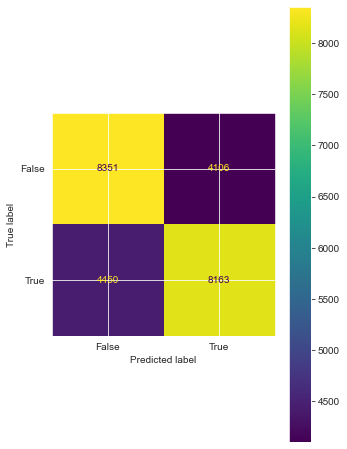

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred)
 
#print ("Confusion Matrix : \n", cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6587155963302752


In [52]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     12457
           1       0.67      0.65      0.66     12613

    accuracy                           0.66     25070
   macro avg       0.66      0.66      0.66     25070
weighted avg       0.66      0.66      0.66     25070



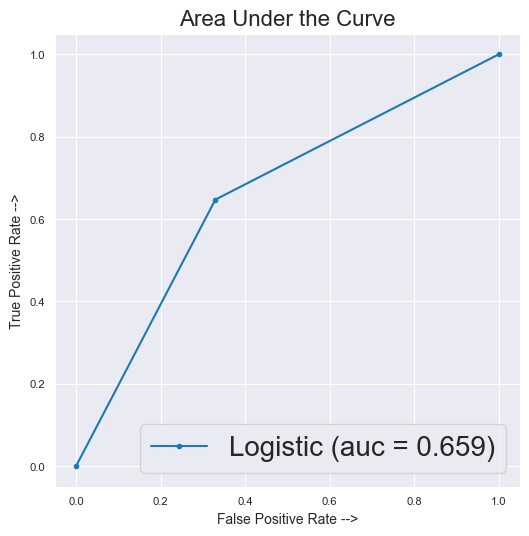

In [53]:
#Plot ROC and compare AUC

from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

# Set label for x-axis
ax.set_xlabel( "False Positive Rate -->" , size = 10 )
  
# Set label for y-axis
ax.set_ylabel( "True Positive Rate -->" , size = 10 )

# Set title for figure
plt.title( "Area Under the Curve" , size = 16 )

#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=8)

#Set Legend Size
plt.rc('legend',fontsize=20) # using a size in points

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)



plt.legend()

plt.show()

# Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import recall_score
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

C:\Users\hp\AppData\Local\Temp\ipykernel_8532\4093932685.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy = 0.87
Recall = 0.83



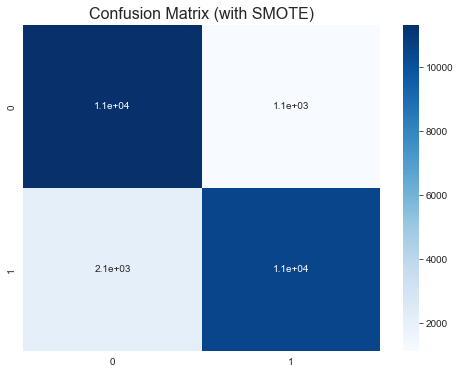

In [89]:
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [90]:
from sklearn.metrics import classification_report
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     12457
           1       0.90      0.83      0.87     12613

    accuracy                           0.87     25070
   macro avg       0.87      0.87      0.87     25070
weighted avg       0.87      0.87      0.87     25070



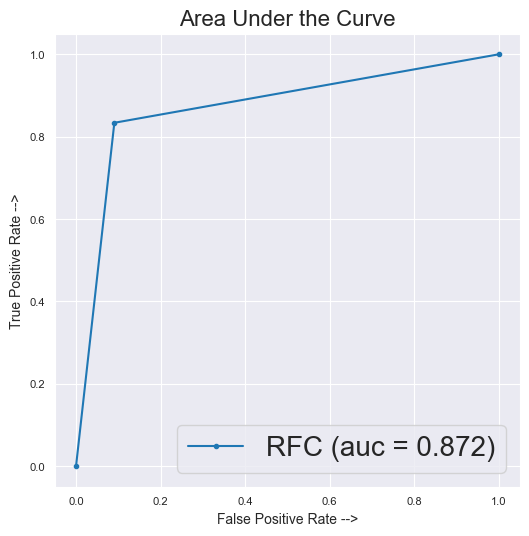

In [91]:
#Plot ROC and compare AUC

from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, preds)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

# Set label for x-axis
ax.set_xlabel( "False Positive Rate -->" , size = 10 )
  
# Set label for y-axis
ax.set_ylabel( "True Positive Rate -->" , size = 10 )

# Set title for figure
plt.title( "Area Under the Curve" , size = 16 )

#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=8)

#Set Legend Size
plt.rc('legend',fontsize=20) # using a size in points

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='RFC (auc = %0.3f)' % auc_logistic)



plt.legend()

plt.show()

# Lasso Regression

R squared Error on test set :  -5.275978415434972
            Column_Name  Coefficient_Value
0             education           0.000000
1       no_of_trainings          -0.000673
2  previous_year_rating           0.108974
3     length_of_service          -0.000000
4            awards_won           0.039873
5    avg_training_score           0.100096
6           is_promoted                NaN


<BarContainer object of 7 artists>

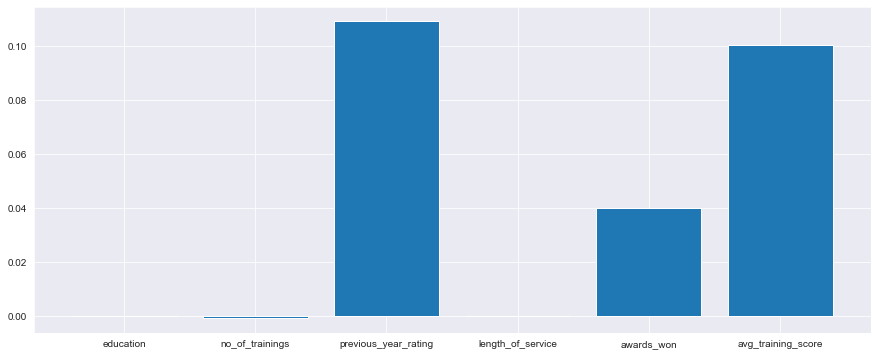

In [85]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Train the model
lassoRegressor = Lasso(alpha = 0.02)#here setting alpha 
lassoRegressor.fit(X_train, y_train)
y_predicted_lasso = lassoRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_lasso,y_test)
print("R squared Error on test set : ", R_squared)

# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = pd.DataFrame(promo.columns)
coefficient_df['Coefficient_Value'] = pd.Series(lassoRegressor.coef_)
print(coefficient_df.head(15))


plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])




In [93]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predicted_lasso))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [94]:
print(f'Accuracy = {accuracy_score(y_test,y_predicted_lasso):.2f}\nRecall = {recall_score(y_test, y_predicted_lasso):.2f}\n')
cm = confusion_matrix(y_test, y_predicted_lasso)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

ValueError: Classification metrics can't handle a mix of binary and continuous targets